#Dog vs Cat


In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle competitions download -c dogs-vs-cats --force

 98% 798M/812M [00:07<00:00, 146MB/s]
100% 812M/812M [00:08<00:00, 106MB/s]


In [3]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [4]:
# extracting
from zipfile import ZipFile

data = '/content/dogs-vs-cats.zip'

with ZipFile(data,'r') as zip:
  zip.extractall()
  print('The data has been extracted!')

The data has been extracted!


In [5]:
from zipfile import ZipFile

data = '/content/train.zip'

with ZipFile(data,'r') as zip:
  zip.extractall()
  print('The data has been extracted!')

The data has been extracted!


In [6]:
import os
path, dirs, files = next(os.walk('/content/train'))
print('Number of images :',len(files))

Number of images : 25000


In [7]:
print(os.listdir('/content/train'))

['dog.2785.jpg', 'cat.2303.jpg', 'cat.7099.jpg', 'dog.12428.jpg', 'dog.8047.jpg', 'dog.360.jpg', 'cat.1920.jpg', 'cat.9903.jpg', 'dog.846.jpg', 'cat.9289.jpg', 'dog.6168.jpg', 'dog.10243.jpg', 'dog.5067.jpg', 'dog.7267.jpg', 'dog.8134.jpg', 'dog.11230.jpg', 'cat.8342.jpg', 'dog.1932.jpg', 'dog.6978.jpg', 'cat.10568.jpg', 'dog.4267.jpg', 'cat.10119.jpg', 'dog.424.jpg', 'dog.2307.jpg', 'cat.11574.jpg', 'cat.9554.jpg', 'dog.4936.jpg', 'dog.10877.jpg', 'cat.6518.jpg', 'dog.3099.jpg', 'cat.3333.jpg', 'cat.11862.jpg', 'dog.3011.jpg', 'dog.4701.jpg', 'dog.1040.jpg', 'cat.10660.jpg', 'dog.2736.jpg', 'cat.1652.jpg', 'cat.4895.jpg', 'dog.7959.jpg', 'cat.7596.jpg', 'dog.10104.jpg', 'cat.4911.jpg', 'cat.4295.jpg', 'dog.7433.jpg', 'cat.8754.jpg', 'dog.2882.jpg', 'dog.11716.jpg', 'dog.7722.jpg', 'dog.1086.jpg', 'cat.7967.jpg', 'dog.11391.jpg', 'cat.11166.jpg', 'cat.10597.jpg', 'cat.3709.jpg', 'cat.6600.jpg', 'dog.3165.jpg', 'cat.10240.jpg', 'cat.9531.jpg', 'cat.12426.jpg', 'cat.9736.jpg', 'dog.3041.

In [8]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mping
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

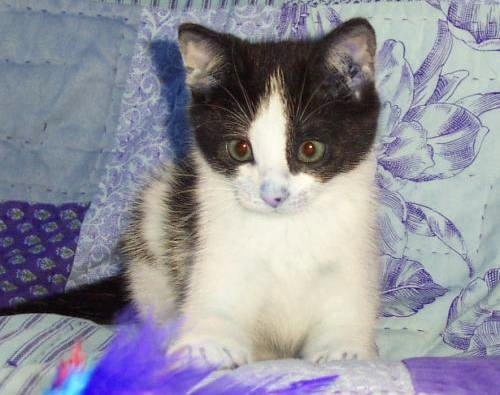

In [9]:
img = mping.imread('/content/train/cat.2409.jpg')
cv2_imshow(img)

In [10]:
img.shape

(395, 500, 3)

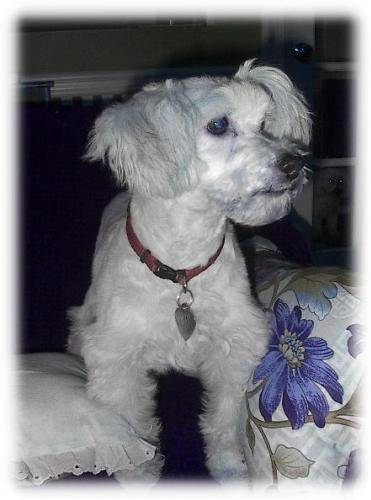

In [11]:
img2 = mping.imread('/content/train/dog.5186.jpg')
cv2_imshow(img2)

In [12]:
img2.shape

(500, 371, 3)

In [13]:
file_names = os.listdir('/content/train')
dog_count = 0
cat_count = 0

for img_name in file_names[0:2000]:
  name = img_name[0:3]

  if name == 'dog':
    dog_count += 1
  else:
    cat_count += 1

print("Number of dog images =",dog_count)
print("Number of cat images =",cat_count)

Number of dog images = 992
Number of cat images = 1008


In [14]:
# Since I am using transfer learning we dont need much data
# only the first 4000 images are needed
orig_size = file_names[:2000]
orig_size = ['/content/train/'+ img_name for img_name in orig_size]
print(orig_size)

['/content/train/dog.2785.jpg', '/content/train/cat.2303.jpg', '/content/train/cat.7099.jpg', '/content/train/dog.12428.jpg', '/content/train/dog.8047.jpg', '/content/train/dog.360.jpg', '/content/train/cat.1920.jpg', '/content/train/cat.9903.jpg', '/content/train/dog.846.jpg', '/content/train/cat.9289.jpg', '/content/train/dog.6168.jpg', '/content/train/dog.10243.jpg', '/content/train/dog.5067.jpg', '/content/train/dog.7267.jpg', '/content/train/dog.8134.jpg', '/content/train/dog.11230.jpg', '/content/train/cat.8342.jpg', '/content/train/dog.1932.jpg', '/content/train/dog.6978.jpg', '/content/train/cat.10568.jpg', '/content/train/dog.4267.jpg', '/content/train/cat.10119.jpg', '/content/train/dog.424.jpg', '/content/train/dog.2307.jpg', '/content/train/cat.11574.jpg', '/content/train/cat.9554.jpg', '/content/train/dog.4936.jpg', '/content/train/dog.10877.jpg', '/content/train/cat.6518.jpg', '/content/train/dog.3099.jpg', '/content/train/cat.3333.jpg', '/content/train/cat.11862.jpg', '/

In [15]:
os.mkdir('/content/train_image_resized/')
resized_path = '/content/train_image_resized/'

for img_path in orig_size:
  img = Image.open(img_path)
  img = img.resize((224,224))
  img = img.convert('RGB') # precaution incase an image is not RGB
  new_path = img_path.replace('/content/train/',resized_path)
  img.save(new_path)


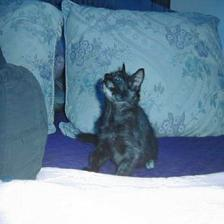

In [18]:
img = mping.imread('/content/train_image_resized/cat.10099.jpg')
cv2_imshow(img)

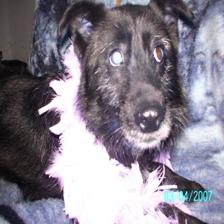

In [21]:
img = mping.imread('/content/train_image_resized/dog.2785.jpg')
cv2_imshow(img)

Creating Labels

cat --> 0

dog --> 1

In [22]:
file_names = os.listdir('/content/train_image_resized')
labels = []
for img in file_names:
  name = img[:3]
  if name == 'dog':
    labels.append(1)
  else:
    labels.append(0)

print([(file_names[i],labels[i]) for i in range(20)])

[('dog.2785.jpg', 1), ('cat.2303.jpg', 0), ('cat.7099.jpg', 0), ('dog.12428.jpg', 1), ('dog.8047.jpg', 1), ('dog.360.jpg', 1), ('cat.1920.jpg', 0), ('cat.9903.jpg', 0), ('dog.846.jpg', 1), ('cat.9289.jpg', 0), ('dog.6168.jpg', 1), ('dog.10243.jpg', 1), ('dog.5067.jpg', 1), ('dog.7267.jpg', 1), ('dog.8134.jpg', 1), ('dog.11230.jpg', 1), ('cat.8342.jpg', 0), ('dog.1932.jpg', 1), ('dog.6978.jpg', 1), ('cat.10568.jpg', 0)]


In [23]:
values, counts = np.unique(labels,return_counts=True)
print(values)
print(counts)

[0 1]
[1008  992]


In [24]:
import cv2
import glob

In [25]:
image_directory = '/content/train_image_resized/'
image_extension =['png','jpg']
files = []
[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]
dc_images = np.asarray([cv2.imread(file) for file in files])

In [28]:
print(dc_images.shape)

(2000, 224, 224, 3)


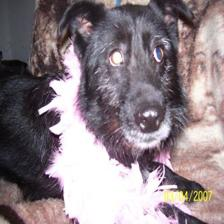

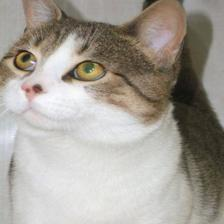

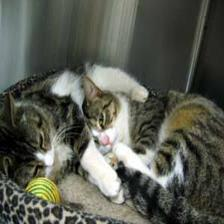

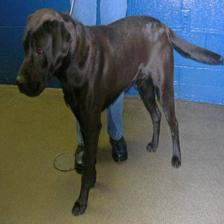

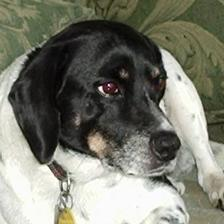

In [29]:
for i in range(5):
  cv2_imshow(dc_images[i])

In [30]:
print(dc_images.shape)

(2000, 224, 224, 3)


In [31]:
X = dc_images
Y = np.asarray(labels)

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [33]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [34]:
X_train = X_train/255
X_test = X_test/255

In [36]:
print(X_train[0:5])

[[[[0.26666667 0.34117647 0.36862745]
   [0.27058824 0.34509804 0.37254902]
   [0.2745098  0.34901961 0.37647059]
   ...
   [0.17647059 0.17647059 0.17647059]
   [0.17647059 0.17647059 0.17647059]
   [0.17647059 0.17647059 0.17647059]]

  [[0.28235294 0.35686275 0.38431373]
   [0.28235294 0.35686275 0.38431373]
   [0.28627451 0.36078431 0.38823529]
   ...
   [0.18039216 0.18039216 0.18039216]
   [0.18039216 0.18039216 0.18039216]
   [0.18039216 0.18039216 0.18039216]]

  [[0.29803922 0.37254902 0.4       ]
   [0.29803922 0.37254902 0.4       ]
   [0.30588235 0.38039216 0.40784314]
   ...
   [0.18431373 0.19215686 0.19215686]
   [0.18039216 0.18823529 0.18823529]
   [0.18039216 0.18823529 0.18823529]]

  ...

  [[0.30980392 0.33333333 0.31372549]
   [0.32156863 0.34509804 0.3254902 ]
   [0.30980392 0.33333333 0.31372549]
   ...
   [0.2745098  0.30588235 0.30196078]
   [0.27058824 0.30196078 0.29803922]
   [0.27058824 0.30196078 0.29803922]]

  [[0.27058824 0.28627451 0.2627451 ]
   [0.2

In [37]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization

In [38]:
mobilenet_model = 'https://www.kaggle.com/models/google/mobilenet-v2/frameworks/TensorFlow2/variations/tf2-preview-feature-vector/versions/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [39]:
classes = 2
model = tf.keras.Sequential([
    pretrained_model,
    Dense(classes)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [40]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [41]:
model.compile(
    optimizer = 'adam',
    loss = loss,
    metrics = ['accuracy']
)

In [42]:
model.fit(X_train, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 9s 40ms/step - loss: 0.1912 - accuracy: 0.9194
Epoch 2/5
50/50 [==============================] - 2s 39ms/step - loss: 0.0613 - accuracy: 0.9800
Epoch 3/5
50/50 [==============================] - 2s 40ms/step - loss: 0.0494 - accuracy: 0.9869
Epoch 4/5
50/50 [==============================] - 2s 44ms/step - loss: 0.0399 - accuracy: 0.9869
Epoch 5/5
50/50 [==============================] - 2s 42ms/step - loss: 0.0299 - accuracy: 0.9912


In [43]:
score, acc = model.evaluate(X_test, Y_test)
print('Test loss =', score)
print('Test acccuracy =',acc*100, '%')

13/13 [==============================] - 2s 98ms/step - loss: 0.0587 - accuracy: 0.9800
Test loss = 0.05873353034257889
Test acccuracy = 98.00000190734863 %


Predictive System

In [45]:
images = os.listdir('/content/train')
print(images[0:5])
images_path = ['/content/train/'+ img_name for img_name in images]

['dog.2785.jpg', 'cat.2303.jpg', 'cat.7099.jpg', 'dog.12428.jpg', 'dog.8047.jpg']


In [46]:
print(images_path[5590])

/content/train/cat.257.jpg


Path of image to be predicted: /content/train/cat.257.jpg


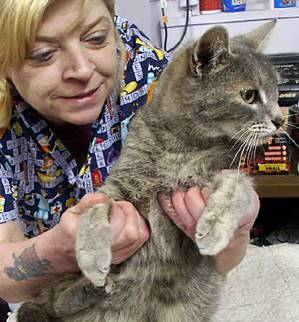

1/1 [==============================] - 1s 1s/step
[[ 2.8156378 -5.1002774]]
Its a cat!


In [47]:
input_image_path = input('Path of image to be predicted: ')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resize = cv2.resize(input_image,(224,224))
input_image_scaled = input_image_resize/255
image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])
input_prediction = model.predict(image_reshaped)
input_pred_label = np.argmax(input_prediction)
print(input_prediction)
print('Its a',('cat!' if input_pred_label==0 else 'dog!'))